In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing CSV

In [400]:
weather=pd.read_csv('E:\\weather.csv') #Importing file from drive

In [401]:
weather.head() #first 5 rows of the Dataset

,DATE,PRCP,TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


# Exploring

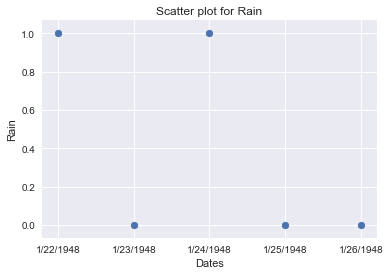

In [402]:
date=weather['DATE'][21:26]
rain=weather['RAIN'][21:26]
plt.xlabel('Dates')
plt.ylabel('Rain')
plt.title('Scatter plot for Rain')
plt.scatter(date,rain)

In [403]:
weather.shape #Here are 96453 rows and 12 columns

(25551, 5)

In [404]:
weather.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [405]:
weather=weather.dropna()
weather.shape

(25548, 5)

In [406]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null object
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [407]:
weather.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [408]:
weather['RAIN'].nunique()

2

In [409]:
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


In [410]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null object
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


# Preprocessing and Cleaning

In [411]:
le=LabelEncoder()
weather['RAIN']=le.fit_transform(weather['RAIN'])
weather['RAIN']=weather['RAIN'].astype('category')

In [412]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [413]:
weather=weather.drop('DATE',1)

In [414]:
x=weather.drop(['RAIN'],axis=1)
y=weather['RAIN']
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [415]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Accuracy and Predictions

In [416]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
roc_auc_score(y_knn,y_test)

0.9876199898148975

In [417]:
labels = [0,1]

In [418]:
a=confusion_matrix(y_knn,y_test,labels)
a

array([[3682,   92],
       [   1, 2612]], dtype=int64)

Text(0.5,1,u'General Trend for Predicted Values')

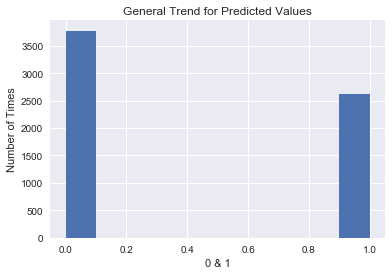

In [419]:
plt.hist(y_knn)
plt.xlabel('0 & 1')
plt.ylabel('Number of Times')
plt.title('General Trend for Predicted Values')

Text(0.5,1,u'General Trend for real Values')

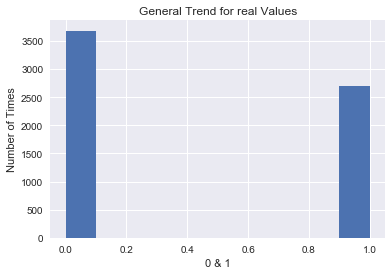

In [420]:
plt.hist(y_test)
plt.xlabel('0 & 1')
plt.ylabel('Number of Times')
plt.title('General Trend for real Values')

In [421]:
import seaborn as sns
sns.set()

Text(0.5,43,u'0 = No Rain , 1 = Rain')

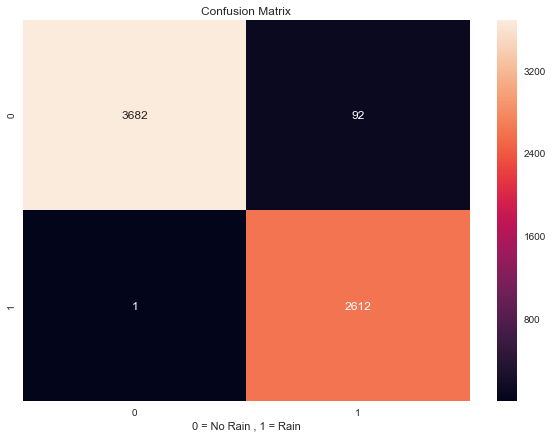

In [422]:
plt.figure(figsize = (10,7))
plt.legend()
sns.heatmap(a,annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('0 = No Rain , 1 = Rain')

# Predicting Values(Enter values for prec , max_temp and min_temp)

In [423]:
knn.predict([[30,40,70]])

array([1], dtype=int64)